In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization,ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import pandas as pd
from ipykernel import kernelapp as app

In [2]:
labels=['PNEUMONIA','NORMAL']
img_size=150
def get_data(data_dir):
    data= []
    for label in labels:
        path=os.path.join(data_dir, label)
        class_num=labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr=cv2.resize(img_arr,(img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                    print(e)
    return np.array(data)

In [3]:
train = get_data('chest_xray/train')
val = get_data('chest_xray/val')
test = get_data('chest_xray/test')

C:\Users\pc\AppData\Local\Temp\ipykernel_13008\320778667.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [4]:
x_train= [] 
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append( label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [5]:
x_train= [] 
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append( label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [6]:
positives=[]
negatives=[]
for i in range(len(y_train)):
    if y_train[i]:
        positives. append(x_train[i])
    else:
        negatives. append(x_train[i])

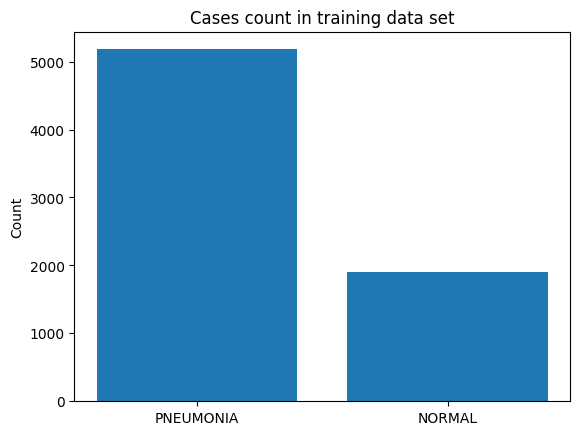

In [7]:
plt.bar(labels, [len(negatives), len(positives)])
plt.title("Cases count in training data set")
plt.ylabel("Count")
plt.show()

(-0.5, 149.5, 149.5, -0.5)

<Figure size 640x480 with 0 Axes>

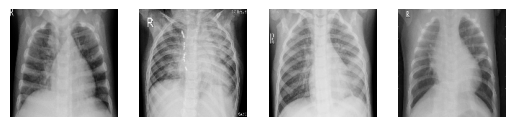

In [8]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,4) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(negatives[4], cmap="gray")
axarr[1].imshow(negatives[1], cmap="gray")
axarr[2].imshow(negatives[2], cmap="gray")
axarr[3].imshow(negatives[3], cmap="gray")
axarr[0].axis("off")
axarr[1].axis("off")
axarr[2].axis("off")
axarr[3].axis("off")

(-0.5, 149.5, 149.5, -0.5)

<Figure size 640x480 with 0 Axes>

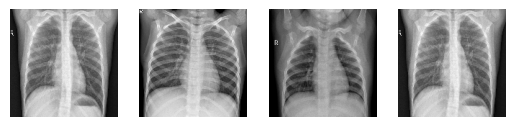

In [9]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,4) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(positives[1], cmap="gray")
axarr[1].imshow(positives[2], cmap="gray")
axarr[2].imshow(positives[20], cmap="gray")
axarr[3].imshow(positives[1], cmap="gray")
axarr[0].axis("off")
axarr[1].axis("off")
axarr[2].axis("off")
axarr[3].axis("off")

In [10]:
# Grayscale Normalization

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [11]:
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [12]:
x_test[0].shape

(150, 150, 1)

In [13]:
y_train= y_train.reshape(-1,1)
y_val= y_val.reshape(-1,1)
y_test= y_test.reshape(-1,1)

In [14]:
datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range = 30, # randomly rotate images in the range (degrees, @ to 180)
            zoom_range = 0.2, # Randomly zoom image
            width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
            horizontal_flip = True, # randomly flip images
            vertical_flip=False) # randomly flip images

 
datagen.fit(x_train)

In [15]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

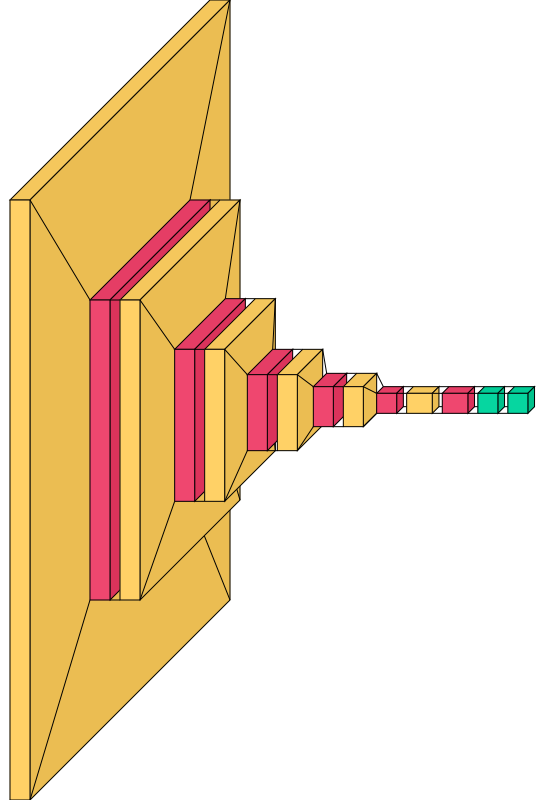

In [16]:
import visualkeras
visualkeras.layered_view(model, type_ignore=[ ZeroPadding2D,BatchNormalization,Flatten,Dropout])

In [17]:
learning_rate_reduction= ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose='1', factor=0.3, min_lr=0.000001)

In [ ]:
history= model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=datagen.flow(x_val, y_val), callbacks=learning_rate_reduction)

Epoch 1/5
222/222 [==============================] - 663s 3s/step - loss: 0.3855 - accuracy: 0.8495 - val_loss: 16.6934 - val_accuracy: 0.7266 - lr: 0.0010
Epoch 2/5
 93/222 [===========>..................] - ETA: 6:06 - loss: 0.2693 - accuracy: 0.8938

In [22]:
from keras.models import load_model
model.save('modeltry2.h5')

In [18]:
cnn = load_model('modeltry2.h5')

NameError: name 'load_model' is not defined

In [24]:
print("Loss of the model is : ",cnn.evaluate(x_test, y_test)[0])
print("Accuracy of the model is : ", cnn.evaluate(x_test, y_test)[1]*100, "%")

73/73 [==============================] - 38s 508ms/step - loss: 2.5866 - accuracy: 0.7314
Loss of the model is :  2.586637020111084
73/73 [==============================] - 39s 534ms/step - loss: 2.5866 - accuracy: 0.7314
Accuracy of the model is :  73.14335107803345 %


In [27]:
predictions= cnn.predict(x_test)
for i in range(len(predictions)):
    predictions[i] = 1 if predictions[i]>0.5 else 0

36/36 [==============================] - 20s 556ms/step


In [28]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia[class 0]', 'Normal[class 1]']))

                    precision    recall  f1-score   support

Pneumonia[class 0]       0.95      0.92      0.94       828
   Normal[class 1]       0.82      0.88      0.85       317

          accuracy                           0.91      1145
         macro avg       0.88      0.90      0.89      1145
      weighted avg       0.91      0.91      0.91      1145



,0,1
0,765,63
1,38,279


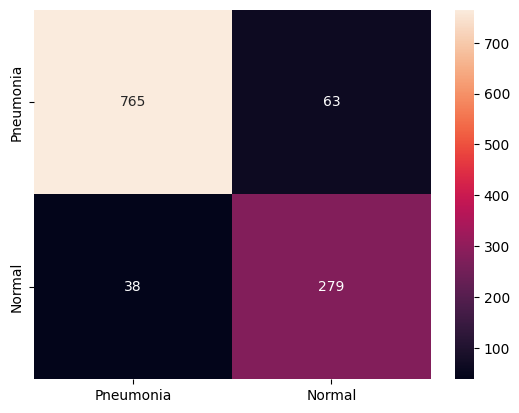

In [29]:
c_matrix=confusion_matrix(y_test, predictions)
c_matrix=pd.DataFrame(c_matrix, index=['0','1'], columns=['0','1'])
sns.heatmap(c_matrix, annot=True, fmt = 'g', xticklabels = ['Pneumonia','Normal'], yticklabels= ['Pneumonia','Normal'])
c_matrix

In [31]:
prob = cnn.predict(x_test)

36/36 [==============================] - 19s 517ms/step


(0.49, 1.01)

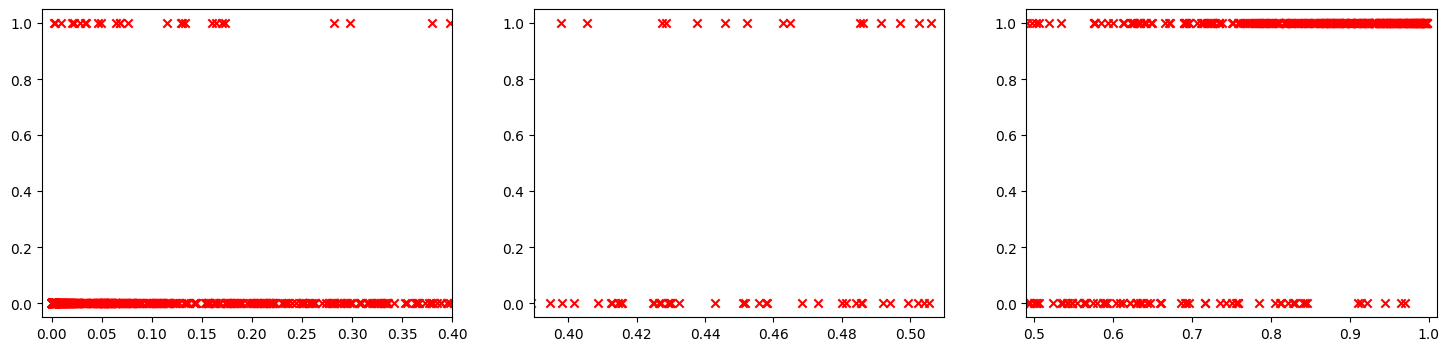

In [32]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.scatter(prob, y_test, marker = 'x', color = 'r');plt.xlim([-0.01, 0.4])
plt.subplot(1,3,2)
plt.scatter(prob, y_test, marker = 'x', color = 'r');plt.xlim([0.39, 0.51])
plt.subplot(1,3,3)
plt.scatter(prob, y_test, marker = 'x', color = 'r');plt.xlim([0.49, 1.01])

In [64]:
import matplotlib.image as mpimg
from tensorflow.keras.utils import img_to_array, load_img
image_path = 'chest_xray\patient side\p1.jpg'
image = mpimg.imread(image_path)

test_image = load_img(image_path, target_size = (150, 150,1))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 1)
predict = cnn.predict(test_image)

UnimplementedError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\pc\AppData\Local\Temp\ipykernel_12168\2999761647.py", line 8, in <module>
      predict = cnn.predict(test_image)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_12329]